**GitHub Repository Analysis**


---



In [610]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#load dataset
df=pd.read_csv('/content/Github_data.csv')
df.head()

,rank,item,repo_name,stars,forks,language,repo_url,username,issues,last_commit,description
0,1,top-100-stars,freeCodeCamp,326065,26086,JavaScript,https://github.com/freeCodeCamp/freeCodeCamp,freeCodeCamp,244,2021-07-14T01:24:39Z,freeCodeCamp.org's open-source codebase and cu...
1,2,top-100-stars,996.ICU,257895,21342,Rust,https://github.com/996icu/996.ICU,996icu,16814,2021-06-24T11:16:12Z,Repo for counting stars and contributing. Pres...
2,3,top-100-stars,free-programming-books,196494,43254,NaN,https://github.com/EbookFoundation/free-progra...,EbookFoundation,33,2021-07-13T20:36:02Z,:books: Freely available programming books
3,4,top-100-stars,vue,185599,29607,JavaScript,https://github.com/vuejs/vue,vuejs,532,2021-07-12T06:50:51Z,"🖖 Vue.js is a progressive, incrementally-adopt..."
4,5,top-100-stars,coding-interview-university,184072,50104,NaN,https://github.com/jwasham/coding-interview-un...,jwasham,46,2021-07-13T01:07:39Z,A complete computer science study plan to beco...


In [611]:
df.isnull().sum()

,0
rank,0
item,0
repo_name,0
stars,0
forks,0
language,29
repo_url,0
username,0
issues,0
last_commit,0


In [612]:
#handling missing values
df["language"]=df["language"].fillna(df["language"].mode()[0])
df = df.dropna(subset=["description"])

#handling duplicates
df = df.drop_duplicates()

df.isnull().sum()


,0
rank,0
item,0
repo_name,0
stars,0
forks,0
language,0
repo_url,0
username,0
issues,0
last_commit,0


In [613]:
#standardizing text data
df["repo_name"] = df["repo_name"].str.lower().str.strip()
df["username"] = df["username"].str.lower().str.strip()
df["language"] = df["language"].str.lower().str.strip()

df["stars"] = pd.to_numeric(df["stars"], errors="coerce")
df["forks"] = pd.to_numeric(df["forks"], errors="coerce")
df["issues"] = pd.to_numeric(df["issues"], errors="coerce")

df.head()


,rank,item,repo_name,stars,forks,language,repo_url,username,issues,last_commit,description
0,1,top-100-stars,freecodecamp,326065,26086,javascript,https://github.com/freeCodeCamp/freeCodeCamp,freecodecamp,244,2021-07-14T01:24:39Z,freeCodeCamp.org's open-source codebase and cu...
1,2,top-100-stars,996.icu,257895,21342,rust,https://github.com/996icu/996.ICU,996icu,16814,2021-06-24T11:16:12Z,Repo for counting stars and contributing. Pres...
2,3,top-100-stars,free-programming-books,196494,43254,javascript,https://github.com/EbookFoundation/free-progra...,ebookfoundation,33,2021-07-13T20:36:02Z,:books: Freely available programming books
3,4,top-100-stars,vue,185599,29607,javascript,https://github.com/vuejs/vue,vuejs,532,2021-07-12T06:50:51Z,"🖖 Vue.js is a progressive, incrementally-adopt..."
4,5,top-100-stars,coding-interview-university,184072,50104,javascript,https://github.com/jwasham/coding-interview-un...,jwasham,46,2021-07-13T01:07:39Z,A complete computer science study plan to beco...


In [620]:
#save cleaned dataset
df.to_csv("Cleaned_GitHub_Repos.csv", index=False)
print("Dataset preprocessing completed")


Dataset preprocessing completed


In [615]:
#top 10 most starred repo's
top_repos = df.sort_values(by="stars", ascending=False).head(10)
print(top_repos[["repo_name", "username", "stars", "language"]])


                       repo_name         username   stars    language
0                   freecodecamp     freecodecamp  326065  javascript
131                 freecodecamp     freecodecamp  326065  javascript
151                      996.icu           996icu  257895        rust
1                        996.icu           996icu  257895        rust
114       free-programming-books  ebookfoundation  196494  javascript
2         free-programming-books  ebookfoundation  196494  javascript
125                          vue            vuejs  185599  javascript
3                            vue            vuejs  185599  javascript
4    coding-interview-university          jwasham  184072  javascript
110  coding-interview-university          jwasham  184072  javascript


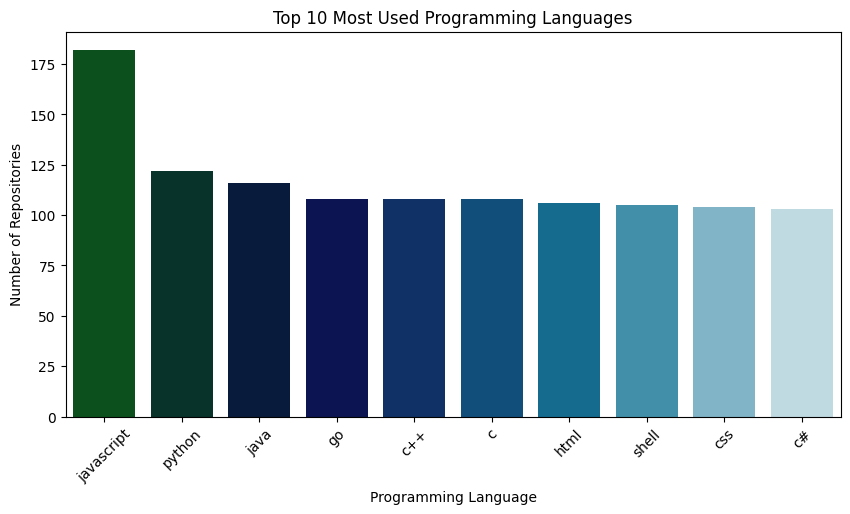

In [616]:
#most popular programming lamguage
import matplotlib.pyplot as plt
import seaborn as sns

language_counts = df["language"].value_counts().head(10)  # Top 10 languages

plt.figure(figsize=(10, 5))
sns.barplot(x=language_counts.index, y=language_counts.values, palette="ocean")
plt.xticks(rotation=45)
plt.xlabel("Programming Language")
plt.ylabel("Number of Repositories")
plt.title("Top 10 Most Used Programming Languages")
plt.show()


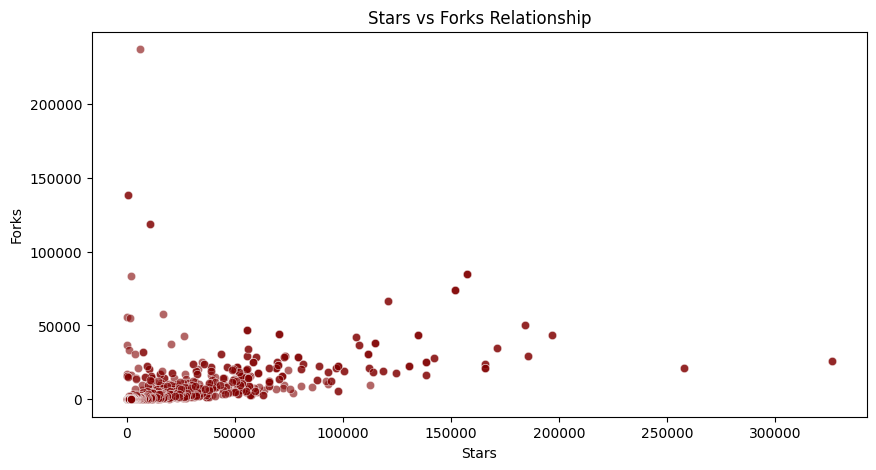

In [627]:
#stars and forks relationship
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["stars"], y=df["forks"], alpha=0.6,color="#800000")
plt.xlabel("Stars")
plt.ylabel("Forks")
plt.title("Stars vs Forks Relationship")
plt.show()



1. **Positive Correlation** – Generally, as the number of stars increases, the number of forks also increases.
2. **Skewed Distribution** – Most of the data points are clustered towards the **lower left**, meaning the majority of repositories have **fewer stars and forks**.
3. **Outliers** – A few repositories have **very high stars and forks**, standing out from the majority. This suggests that **only a few repositories become extremely popular**.
4. **Diminishing Returns** – The spread of forks does not increase proportionally with stars. Some repositories have high stars but relatively fewer forks, indicating that starring a repository does not always mean forking it.


---



Train Accuracy: 1.0
Test Accuracy: 0.8768115942028986
F1-score: 0.8731343283582089

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       278
           1       0.89      0.85      0.87       274

    accuracy                           0.88       552
   macro avg       0.88      0.88      0.88       552
weighted avg       0.88      0.88      0.88       552

Model has a good balance between bias and variance


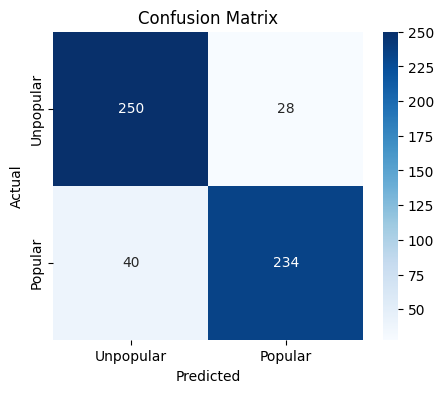

In [619]:
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Convert 'last_commit' to days since today
df["last_commit"] = pd.to_datetime(df["last_commit"], errors="coerce").dt.tz_localize(None)
df["days_since_last_commit"] = (datetime.today() - df["last_commit"]).dt.days

# Drop original date column
df = df.drop(columns=["last_commit"])

# Define Target Variable: Popular (1) if stars > median, else Unpopular (0)
median_stars = df["stars"].median()
df["popular"] = (df["stars"] > median_stars).astype(int)

# One-Hot Encoding
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoded_lang = pd.DataFrame(encoder.fit_transform(df[["language"]]))
encoded_lang.columns = encoder.get_feature_names_out(["language"])
df = df.join(encoded_lang).drop(columns=["language"])

features = ["forks", "issues", "days_since_last_commit"] + list(encoded_lang.columns)
X = df[features]
y = df["popular"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluation
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("F1-score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# Overfitting Check
if train_accuracy > test_accuracy * 1.2:
    print("Warning: Model is Overfitting")
elif test_accuracy < 0.6:
    print("Model might be underfitting! Consider adding more features")
else:
    print("Model has a good balance between bias and variance")

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Unpopular", "Popular"], yticklabels=["Unpopular", "Popular"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

